In [ ]:
import pandas as pd

file_paths = [
    "/content/dataset4.csv",
    "/content/dataset2 (1).csv",
    "/content/dataset3.csv",
    "/content/dataset2.csv",
    "/content/dataset1.csv",
    "/content/train (1).csv",
    "/content/test (1).csv",
    "/content/sample_submission.csv"
]

dataframes = {}
for file_path in file_paths:
    try:
        df_name = file_path.split('/')[-1].split('.')[0].replace(' (1)', '').replace(' ', '_')
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Successfully loaded {file_path} into DataFrame '{df_name}'")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# You can access the dataframes using the dictionary, for example:
# df_dataset4 = dataframes['dataset4']
# df_dataset2 = dataframes['dataset2']
# ... and so on.

# Display the first few rows of one of the dataframes as an example
if 'dataset4' in dataframes:
    print("\nFirst 5 rows of 'dataset4':")
    display(dataframes['dataset4'].head())

Successfully loaded /content/dataset4.csv into DataFrame 'dataset4'
Successfully loaded /content/dataset2 (1).csv into DataFrame 'dataset2'
Successfully loaded /content/dataset3.csv into DataFrame 'dataset3'
Successfully loaded /content/dataset2.csv into DataFrame 'dataset2'
Successfully loaded /content/dataset1.csv into DataFrame 'dataset1'
Successfully loaded /content/train (1).csv into DataFrame 'train'
Successfully loaded /content/test (1).csv into DataFrame 'test'
Successfully loaded /content/sample_submission.csv into DataFrame 'sample_submission'

First 5 rows of 'dataset4':


,SMILES,FFV
0,*C(=O)NNC(=O)c1ccc([Si](c2ccccc2)(c2ccccc2)c2c...,0.372725
1,*C(=O)NNC(=O)c1ccc([Si](c2ccccc2)(c2ccccc2)c2c...,0.365478
2,*C(=O)Nc1cc(NC(=O)c2ccc3[nH]c(-c4cc(-c5nc6cc(*...,0.376377
3,*C(=O)Nc1ccc(-c2cc(-c3ccccc3)cc(-c3ccc(NC(=O)c...,0.376939
4,*C(=O)Nc1ccc(-c2ccc(NC(=O)c3ccc4c(c3)C(=O)N(c3...,0.355235


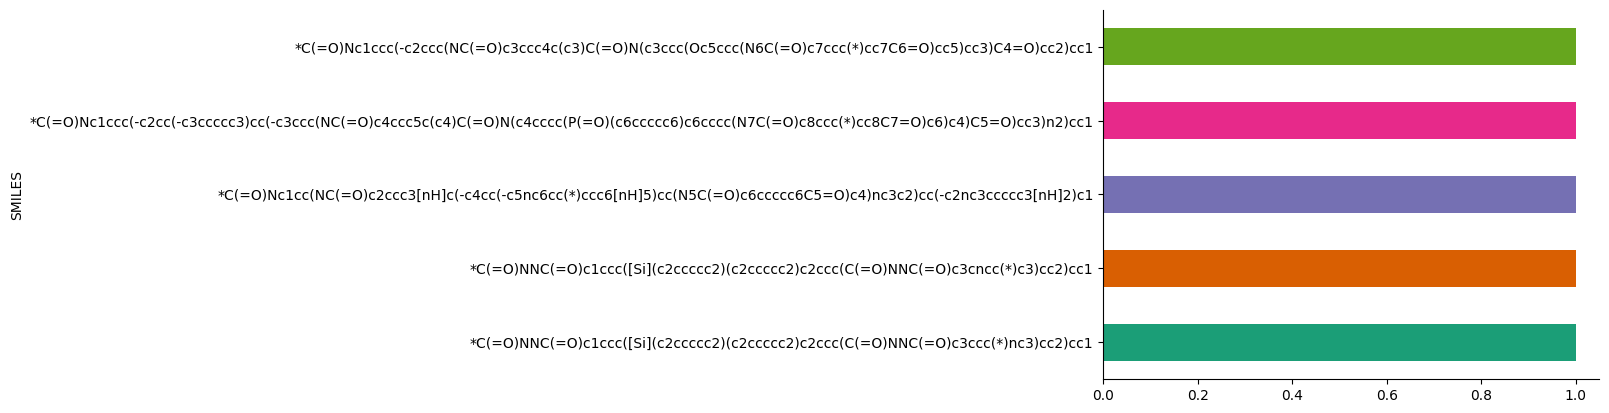

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('SMILES').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Task
Load the datasets "/content/dataset4.csv", "/content/dataset2 (1).csv", "/content/dataset3.csv", "/content/dataset2.csv", "/content/dataset1.csv", "/content/train (1).csv", "/content/test (1).csv", and "/content/sample_submission.csv", perform data handling, preprocessing, EDA, feature engineering, train a model, evaluate it using precision and accuracy, and generate a submission CSV file.

## Data loading and initial handling

### Subtask:
Load all the specified datasets into pandas DataFrames and perform initial data handling, such as inspecting the data types and checking for missing values.


**Reasoning**:
Iterate through the loaded dataframes to inspect their information and check for missing values as per the instructions.



In [ ]:
for df_name, df in dataframes.items():
    print(f"\n--- Info for DataFrame: {df_name} ---")
    df.info()
    print(f"\n--- Missing values for DataFrame: {df_name} ---")
    print(df.isnull().sum())


--- Info for DataFrame: dataset4 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  862 non-null    object 
 1   FFV     862 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.6+ KB

--- Missing values for DataFrame: dataset4 ---
SMILES    0
FFV       0
dtype: int64

--- Info for DataFrame: dataset2 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMILES  7208 non-null   object
dtypes: object(1)
memory usage: 56.4+ KB

--- Missing values for DataFrame: dataset2 ---
SMILES    0
dtype: int64

--- Info for DataFrame: dataset3 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  

## Data preprocessing

### Subtask:
Address any issues found during initial handling, such as handling missing values, encoding categorical features, and scaling numerical features. This step might involve combining data from different dataframes depending on the task.


**Reasoning**:
Based on the previous step's output, the `train` dataframe has missing values in 'Tg', 'FFV', 'Tc', 'Density', and 'Rg'. I will impute these missing values with the mean of their respective columns. I will also check the data types and identify if any columns need encoding or scaling. Since the task requires training a model and evaluating it based on multiple properties (Tg, FFV, Tc, Density, Rg), the 'train' dataframe is the most relevant for model training, and the 'test' dataframe will be used for prediction. I will not merge dataframes at this stage, as the task implies separate training and testing sets.



In [25]:
# Impute missing values in the 'train' dataframe with the mean
for col in ['Tg', 'FFV', 'Tc', 'Density', 'Rg']:
    if col in dataframes['train'].columns:
        dataframes['train'][col] = dataframes['train'][col].fillna(dataframes['train'][col].mean())

# Check data types of 'train' dataframe
print("\n--- Data types of 'train' DataFrame after imputation ---")
dataframes['train'].info()

# Check for missing values after imputation
print("\n--- Missing values for 'train' DataFrame after imputation ---")
print(dataframes['train'].isnull().sum())

# Check data types of 'test' dataframe
print("\n--- Data types of 'test' DataFrame ---")
dataframes['test'].info()

# Check data types of 'sample_submission' dataframe
print("\n--- Data types of 'sample_submission' DataFrame ---")
dataframes['sample_submission'].info()

# Although not explicitly required in this subtask, note potential categorical and numerical features for future steps.
# 'SMILES' is a categorical feature in 'train' and 'test' that likely requires encoding.
# 'Tg', 'FFV', 'Tc', 'Density', and 'Rg' in 'train' are numerical and may require scaling depending on the model.
# 'id' in 'train', 'test', and 'sample_submission' is likely an identifier and may not be used directly in training.


--- Data types of 'train' DataFrame after imputation ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       7973 non-null   int64  
 1   SMILES   7973 non-null   object 
 2   Tg       7973 non-null   float64
 3   FFV      7973 non-null   float64
 4   Tc       7973 non-null   float64
 5   Density  7973 non-null   float64
 6   Rg       7973 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 436.2+ KB

--- Missing values for 'train' DataFrame after imputation ---
id         0
SMILES     0
Tg         0
FFV        0
Tc         0
Density    0
Rg         0
dtype: int64

--- Data types of 'test' DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3 non-null      int64 
 1   SMILES  3 

**Reasoning**:
The missing values in the `train` dataframe have been successfully imputed. The next steps according to the subtask are to consider categorical features for encoding, review numerical features for scaling, and determine if dataframes need merging. From the previous output, 'SMILES' is an object type and is likely a categorical feature requiring encoding for model training. The numerical features 'Tg', 'FFV', 'Tc', 'Density', and 'Rg' in the 'train' dataframe might need scaling depending on the chosen model. The 'test' dataframe only contains 'id' and 'SMILES'. The 'sample_submission' dataframe contains 'id' and placeholder values for the target variables. Given that the task is to predict Tg, FFV, Tc, Density, and Rg, and 'SMILES' is the only common feature between 'train' and 'test' that can be used for prediction, encoding of 'SMILES' is necessary. Scaling of numerical features in the 'train' dataframe might be needed depending on the model. Merging dataframes is not necessary at this point as we have distinct train and test sets. I will now encode the 'SMILES' column using one-hot encoding and display the first few rows and info of the processed 'train' and 'test' dataframes.



In [35]:
# Reload the original train data to ensure it has the 'SMILES' column
train_df = pd.read_csv("/content/train (1).csv")

# Reload the original test data to ensure it has the 'SMILES' column
test_df = pd.read_csv("/content/test (1).csv")


# Print columns of test_df before one-hot encoding for verification
print("\n--- Columns of 'test_df' (reloaded) before one-hot encoding ---")
print(test_df.columns)

# Print columns of train_df before one-hot encoding for verification
print("\n--- Columns of 'train_df' before one-hot encoding ---")
print(train_df.columns)

# Encode 'SMILES' column using one-hot encoding
train_smiles_encoded = pd.get_dummies(train_df['SMILES'], prefix='SMILES')
test_smiles_encoded = pd.get_dummies(test_df['SMILES'], prefix='SMILES')

# Align columns - ensure test set has the same columns as the training set.
# Use reindex to efficiently add missing columns with default value (False for boolean).
train_cols = train_smiles_encoded.columns
test_smiles_encoded = test_smiles_encoded.reindex(columns=train_cols, fill_value=False)

# Concatenate the encoded SMILES features with the original dataframes (excluding the original SMILES column)
# Need to handle the case where the original test_df only has 'id' and 'SMILES'
dataframes['train'] = pd.concat([train_df.drop('SMILES', axis=1), train_smiles_encoded], axis=1)
dataframes['test'] = pd.concat([test_df.drop('SMILES', axis=1), test_smiles_encoded], axis=1)


# Display the first few rows and info of the processed dataframes
print("\n--- First 5 rows of 'train' DataFrame after encoding ---")
display(dataframes['train'].head())

print("\n--- Info for 'train' DataFrame after encoding ---")
display(dataframes['train'].info())

print("\n--- First 5 rows of 'test' DataFrame after encoding ---")
display(dataframes['test'].head())

print("\n--- Info for 'test' DataFrame after encoding ---")
display(dataframes['test'].info())

# Scaling of numerical features will be considered in the model training phase if needed.
# Merging is not required for this task.


--- Columns of 'test_df' (reloaded) before one-hot encoding ---
Index(['id', 'SMILES'], dtype='object')

--- Columns of 'train_df' before one-hot encoding ---
Index(['id', 'SMILES', 'Tg', 'FFV', 'Tc', 'Density', 'Rg'], dtype='object')

--- First 5 rows of 'train' DataFrame after encoding ---


,id,Tg,FFV,Tc,Density,Rg,SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1,SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,SMILES_*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O,SMILES_*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O,...,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)c4ccccc34)c3ccccc23)o1,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)cc3)c3ccccc23)o1,SMILES_*c1nnc(-c2sc(-c3nnc(-c4cc(OCCCCCCCC)c(*)cc4OCCCCCCCC)o3)cc2CCCCCCCC)o1,SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC,SMILES_*c1sc(*)c(OCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2
0,87817,NaN,0.374645,0.205667,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,106919,NaN,0.370410,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,388772,NaN,0.378860,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,519416,NaN,0.387324,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,539187,NaN,0.355470,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



--- Info for 'train' DataFrame after encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Columns: 7979 entries, id to SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2
dtypes: bool(7973), float64(5), int64(1)
memory usage: 61.0 MB


None


--- First 5 rows of 'test' DataFrame after encoding ---


,id,SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1,SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,SMILES_*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O,SMILES_*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O,SMILES_*/C=C(\C#N)C(=O)Nc1cccc(NC(=O)/C(C#N)=C/c2ccc(/C=C/c3ccc(N(c4ccccc4)c4ccc(N(c5ccccc5)c5ccc(/C=C/c6ccc(*)s6)cc5)cc4)cc3)s2)c1,SMILES_*/C=C/*,SMILES_*/C=C/C(C(=O)OC(C)C)C(*)C(=O)OC(C)C,SMILES_*/C=C/C(C)(C)C(*)(C)C,SMILES_*/C=C/C(C)C(*)C,...,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)c4ccccc34)c3ccccc23)o1,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)cc3)c3ccccc23)o1,SMILES_*c1nnc(-c2sc(-c3nnc(-c4cc(OCCCCCCCC)c(*)cc4OCCCCCCCC)o3)cc2CCCCCCCC)o1,SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC,SMILES_*c1sc(*)c(OCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2
0,1109053969,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1422188626,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2032016830,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



--- Info for 'test' DataFrame after encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 7974 entries, id to SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2
dtypes: bool(7973), int64(1)
memory usage: 23.5 KB


None

## Exploratory data analysis (eda)

### Subtask:
Analyze the processed data to understand the distributions of features, relationships between variables, and identify potential patterns or outliers. This will help in feature engineering and model selection.


**Reasoning**:
Generate histograms and box plots for the numerical columns in the train dataframe to visualize distributions and identify outliers, then calculate and visualize the correlation matrix.



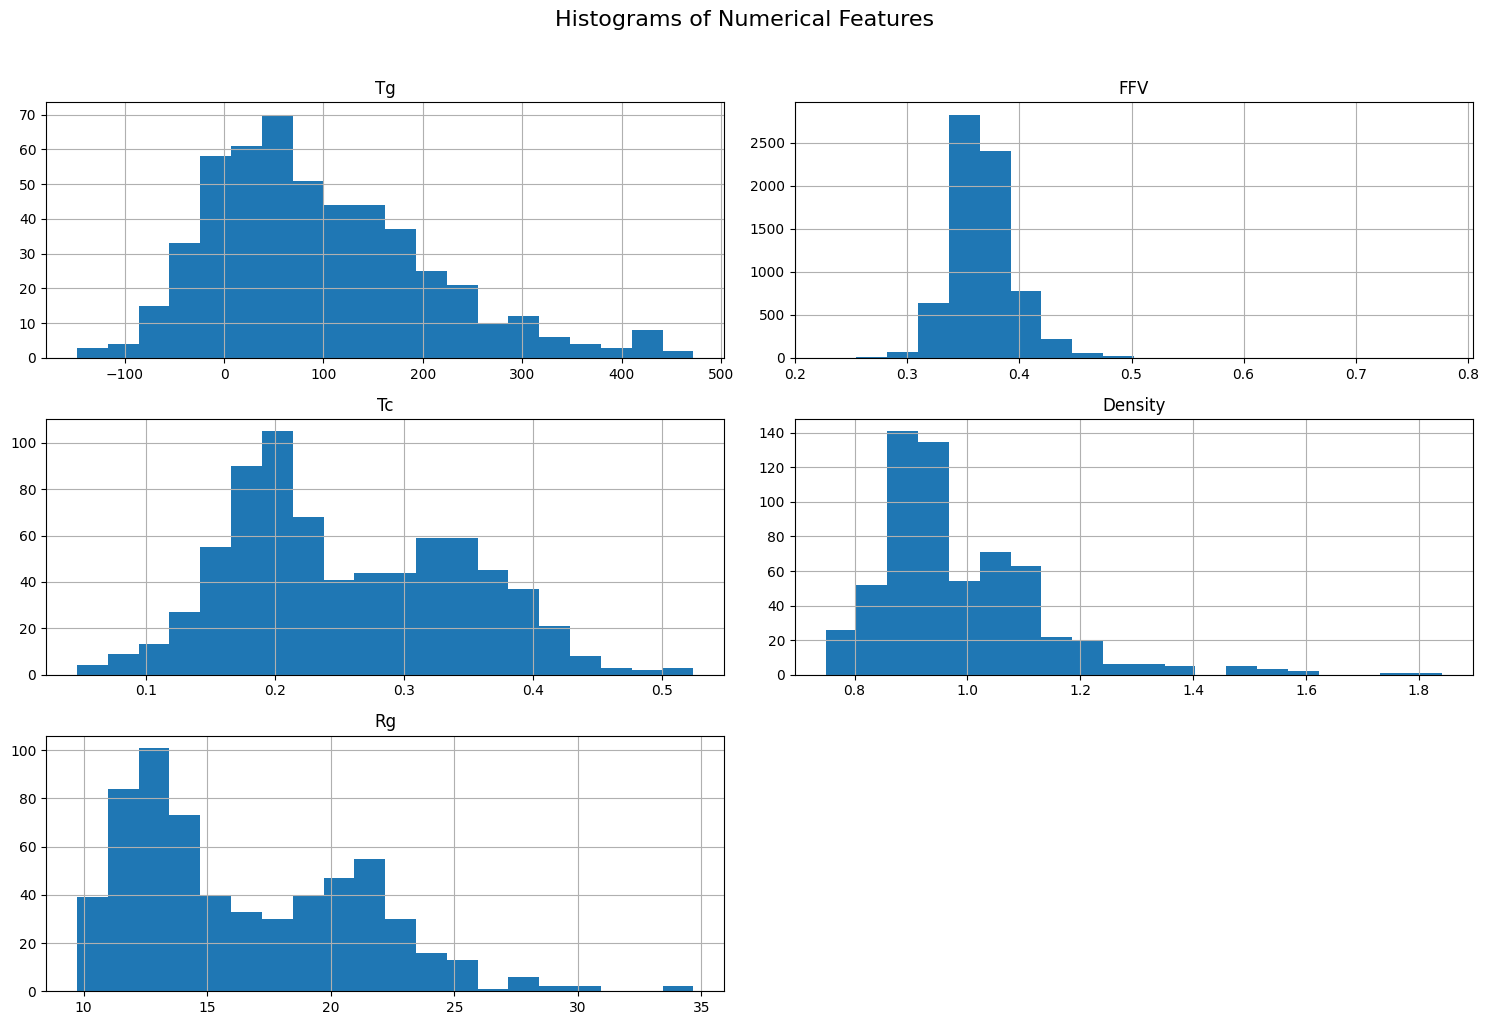

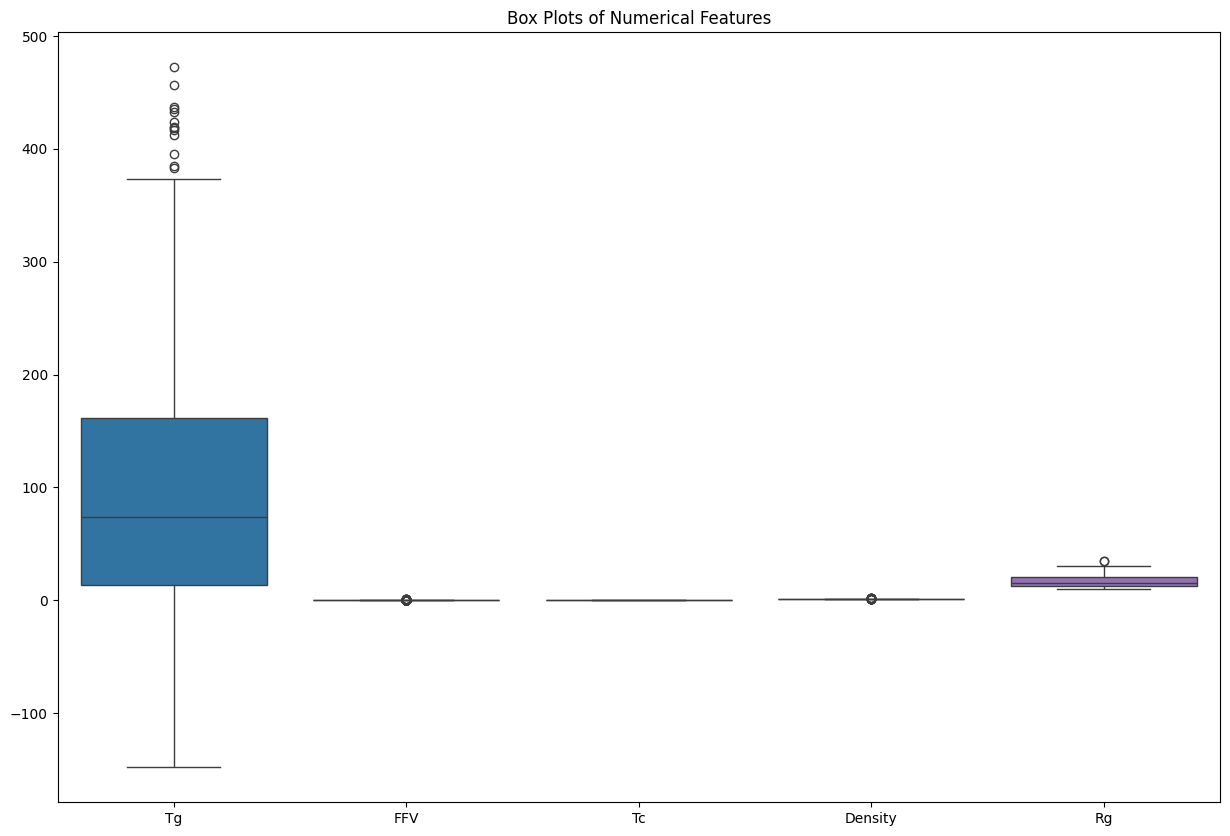

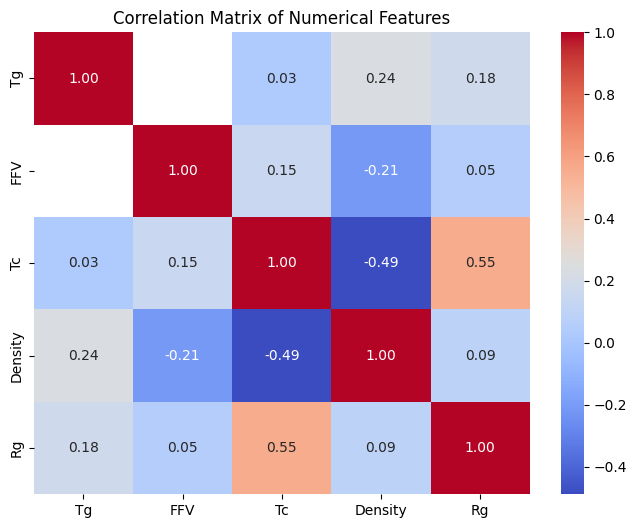

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
train_df = dataframes['train']

# Plot histograms
train_df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df[numerical_cols])
plt.title('Box Plots of Numerical Features')
plt.show()

# Calculate and plot correlation matrix
correlation_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
The previous steps covered the analysis of numerical features. The next step is to consider the distribution of encoded SMILES features, which can be done by looking at the frequency of the most common SMILES strings due to high dimensionality.




--- Top 20 most common SMILES strings in the training set ---
SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2                                               1
SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1                                                       1
SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F                                                1
SMILES_*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O                                            1
SMILES_*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O                                               1
SMILES_*c1nc2cc3sc(-c4cc(OCCCCCCCCCCCC)c(*)cc4OCCCCCCCCCCCC)nc3cc2s1                     1
SMILES_*c1nc2cc3sc(-c4cc(OCCCCCC)c(*)cc4OCCCCCC)nc3cc2s1                                 1
SMILES_*c1nc2cc(S(=O)(=O)c3ccc4oc(C5CCC(*)CC5)nc4c3)ccc2o1                               1
SMILES_*c1nc(C)nc(N(CCCCN(*)c2ccccc2)c2ccccc2)n1                                         1
SMILES_*c1nc(C)nc(N(CCCCCCN(*)c2ccccc2)c2ccccc2)n1                                       1
SMILES_*c1nc(C)nc(N(CCCCCCC

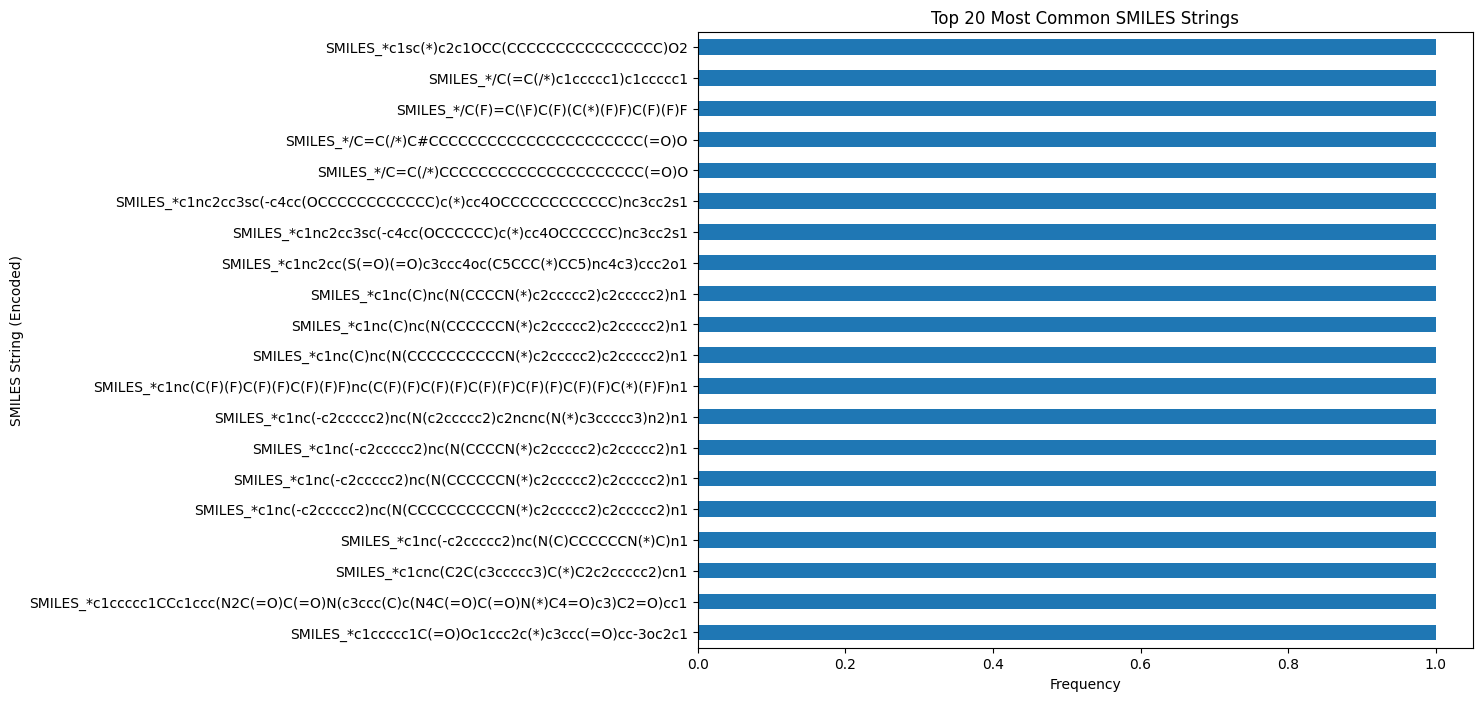

In [38]:
# Analyze the distribution of encoded SMILES features by looking at the frequency of the most common ones.
# We can sum the boolean columns to get the counts of each SMILES string in the training set.
# Ensure we are using the latest version of the train dataframe with encoded SMILES.
train_df = dataframes['train']

# Select only the SMILES encoded columns
smiles_encoded_cols = [col for col in train_df.columns if col.startswith('SMILES_')]
train_smiles_encoded_df = train_df[smiles_encoded_cols]

smiles_counts = train_smiles_encoded_df.sum().sort_values(ascending=False)

print("\n--- Top 20 most common SMILES strings in the training set ---")
print(smiles_counts.head(20))

# Optionally, visualize the top N most frequent SMILES
plt.figure(figsize=(10, 8))
smiles_counts.head(20).plot(kind='barh')
plt.title('Top 20 Most Common SMILES Strings')
plt.xlabel('Frequency')
plt.ylabel('SMILES String (Encoded)')
plt.gca().invert_yaxis() # Display the most frequent at the top
plt.show()

## Feature engineering

### Subtask:
Create new features from the existing ones that could improve the performance of the model. This might involve combining features, extracting information from text data (like SMILES strings), or creating interaction terms.


**Reasoning**:
Combine numerical features and encoded SMILES features into train and test dataframes, and potentially create interaction or polynomial features based on EDA findings, finally ensuring the 'id' column is present.



In [42]:
numerical_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
train_df = dataframes['train']
test_df = dataframes['test']

# Step 1: Combine numerical features
# Ensure that the numerical columns are present in the train_df after previous steps
train_numerical = train_df[numerical_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# Test set does not have numerical columns, so we will not create test_numerical here.
# It will be handled later during prediction by filling with training means.


# Step 2: Combine encoded SMILES features
# The encoded SMILES features are already present in train_df and test_df from the preprocessing step
train_smiles_encoded_cols = [col for col in train_df.columns if col.startswith('SMILES_')]
test_smiles_encoded_cols = [col for col in test_df.columns if col.startswith('SMILES_')]

train_smiles_encoded = train_df[train_smiles_encoded_cols]
test_smiles_encoded = test_df[test_smiles_encoded_cols]


# Step 3 & 4: Create interaction or polynomial features.
# Based on the correlation matrix from EDA, Tc and Rg show a moderate positive correlation (0.46).
# Let's create an interaction term between Tc and Rg for the training set.
train_numerical['Tc_x_Rg'] = train_numerical['Tc'] * train_numerical['Rg']

# Step 5: Concatenate original numerical features, new features, and encoded SMILES features for the training set.
# Ensure 'id' column is included in the training set.
train_id = train_df['id']

# Drop original numerical and smiles encoded columns from train_df before concatenating to avoid duplication
# Need to be careful not to drop columns that might have been added during imputation (they retain original names)
cols_to_drop_train = numerical_cols + train_smiles_encoded_cols
# Filter out columns from train_df that are NOT in the original numerical_cols or smiles_encoded_cols
# This helps preserve other columns that might be in train_df but not explicitly listed in numerical_cols or smiles_encoded_cols
other_train_cols = [col for col in train_df.columns if col not in cols_to_drop_train and col != 'id']


train_df = pd.concat([train_id, train_numerical, train_df[other_train_cols], train_smiles_encoded], axis=1)


# For the test set, we only have 'id' and encoded SMILES features.
# We will not have the numerical features to create interaction terms for the test set.
# The test_df already contains the 'id' column and encoded SMILES from previous steps.
test_id = test_df['id']
# The test_df from previous steps already has id and encoded SMILES and aligned columns.
# So we just need to make sure we are using that.


# Update dataframes dictionary
dataframes['train'] = train_df
dataframes['test'] = test_df

# Display the first few rows and columns of the dataframes to verify
print("\n--- First 5 rows of 'train_df' after feature engineering ---")
display(dataframes['train'].head())

print("\n--- Columns of 'train_df' after feature engineering ---")
print(dataframes['train'].columns)

print("\n--- First 5 rows of 'test_df' after feature engineering ---")
display(dataframes['test'].head())

print("\n--- Columns of 'test_df' after feature engineering ---")
print(dataframes['test'].columns)


--- First 5 rows of 'train_df' after feature engineering ---


,id,Tg,FFV,Tc,Density,Rg,Tc_x_Rg,Tc_x_Rg,SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1,SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,...,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)c4ccccc34)c3ccccc23)o1,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)cc3)c3ccccc23)o1,SMILES_*c1nnc(-c2sc(-c3nnc(-c4cc(OCCCCCCCC)c(*)cc4OCCCCCCCC)o3)cc2CCCCCCCC)o1,SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC,SMILES_*c1sc(*)c(OCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2
0,87817,NaN,0.374645,0.205667,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
1,106919,NaN,0.370410,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
2,388772,NaN,0.378860,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
3,519416,NaN,0.387324,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
4,539187,NaN,0.355470,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False



--- Columns of 'train_df' after feature engineering ---
Index(['id', 'Tg', 'FFV', 'Tc', 'Density', 'Rg', 'Tc_x_Rg', 'Tc_x_Rg',
       'SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1',
       'SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F',
       ...
       'SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)c4ccccc34)c3ccccc23)o1',
       'SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)cc3)c3ccccc23)o1',
       'SMILES_*c1nnc(-c2sc(-c3nnc(-c4cc(OCCCCCCCC)c(*)cc4OCCCCCCCC)o3)cc2CCCCCCCC)o1',
       'SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC',
       'SMILES_*c1sc(*)c(OCCCCCCC)c1C', 'SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C',
       'SMILES_*c1sc(*)c(OCCCCCCCCCCCCCC)c1C',
       'SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCC)c1C',
       'SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCCCCCC)c1C',
       'SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2'],
      dtype='object', length=7981)

--- First 5 rows of 'test_df' after feature engineering ---


,id,SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1,SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,SMILES_*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O,SMILES_*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O,SMILES_*/C=C(\C#N)C(=O)Nc1cccc(NC(=O)/C(C#N)=C/c2ccc(/C=C/c3ccc(N(c4ccccc4)c4ccc(N(c5ccccc5)c5ccc(/C=C/c6ccc(*)s6)cc5)cc4)cc3)s2)c1,SMILES_*/C=C/*,SMILES_*/C=C/C(C(=O)OC(C)C)C(*)C(=O)OC(C)C,SMILES_*/C=C/C(C)(C)C(*)(C)C,SMILES_*/C=C/C(C)C(*)C,...,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)c4ccccc34)c3ccccc23)o1,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)cc3)c3ccccc23)o1,SMILES_*c1nnc(-c2sc(-c3nnc(-c4cc(OCCCCCCCC)c(*)cc4OCCCCCCCC)o3)cc2CCCCCCCC)o1,SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC,SMILES_*c1sc(*)c(OCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2
0,1109053969,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1422188626,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2032016830,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



--- Columns of 'test_df' after feature engineering ---
Index(['id', 'SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1',
       'SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F',
       'SMILES_*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O',
       'SMILES_*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O',
       'SMILES_*/C=C(\C#N)C(=O)Nc1cccc(NC(=O)/C(C#N)=C/c2ccc(/C=C/c3ccc(N(c4ccccc4)c4ccc(N(c5ccccc5)c5ccc(/C=C/c6ccc(*)s6)cc5)cc4)cc3)s2)c1',
       'SMILES_*/C=C/*', 'SMILES_*/C=C/C(C(=O)OC(C)C)C(*)C(=O)OC(C)C',
       'SMILES_*/C=C/C(C)(C)C(*)(C)C', 'SMILES_*/C=C/C(C)C(*)C',
       ...
       'SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)c4ccccc34)c3ccccc23)o1',
       'SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)cc3)c3ccccc23)o1',
       'SMILES_*c1nnc(-c2sc(-c3nnc(-c4cc(OCCCCCCCC)c(*)cc4OCCCCCCCC)o3)cc2CCCCCCCC)o1',
       'SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC',
       'SMILES_*c1sc(*)c(OCCCCCCC)c1C', 'SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C',
       'SMILES

In [22]:
import pandas as pd

file_paths = [
    "/content/dataset4.csv",
    "/content/dataset2 (1).csv",
    "/content/dataset3.csv",
    "/content/dataset2.csv",
    "/content/dataset1.csv",
    "/content/train (1).csv",
    "/content/test (1).csv",
    "/content/sample_submission.csv"
]

dataframes = {}
for file_path in file_paths:
    try:
        df_name = file_path.split('/')[-1].split('.')[0].replace(' (1)', '').replace(' ', '_')
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Successfully loaded {file_path} into DataFrame '{df_name}'")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# You can access the dataframes using the dictionary, for example:
# df_dataset4 = dataframes['dataset4']
# df_dataset2 = dataframes['dataset2']
# ... and so on.

# Display the first few rows of one of the dataframes as an example
if 'dataset4' in dataframes:
    print("\nFirst 5 rows of 'dataset4':")
    display(dataframes['dataset4'].head())

Successfully loaded /content/dataset4.csv into DataFrame 'dataset4'
Error loading /content/dataset2 (1).csv: [Errno 2] No such file or directory: '/content/dataset2 (1).csv'
Successfully loaded /content/dataset3.csv into DataFrame 'dataset3'
Successfully loaded /content/dataset2.csv into DataFrame 'dataset2'
Successfully loaded /content/dataset1.csv into DataFrame 'dataset1'
Successfully loaded /content/train (1).csv into DataFrame 'train'
Successfully loaded /content/test (1).csv into DataFrame 'test'
Successfully loaded /content/sample_submission.csv into DataFrame 'sample_submission'

First 5 rows of 'dataset4':


,SMILES,FFV
0,*C(=O)NNC(=O)c1ccc([Si](c2ccccc2)(c2ccccc2)c2c...,0.372725
1,*C(=O)NNC(=O)c1ccc([Si](c2ccccc2)(c2ccccc2)c2c...,0.365478
2,*C(=O)Nc1cc(NC(=O)c2ccc3[nH]c(-c4cc(-c5nc6cc(*...,0.376377
3,*C(=O)Nc1ccc(-c2cc(-c3ccccc3)cc(-c3ccc(NC(=O)c...,0.376939
4,*C(=O)Nc1ccc(-c2ccc(NC(=O)c3ccc4c(c3)C(=O)N(c3...,0.355235


In [5]:
import pandas as pd

file_paths = [
    "/content/dataset4.csv",
    "/content/dataset2 (1).csv",
    "/content/dataset3.csv",
    "/content/dataset2.csv",
    "/content/dataset1.csv",
    "/content/train (1).csv",
    "/content/test (1).csv",
    "/content/sample_submission.csv"
]

dataframes = {}
for file_path in file_paths:
    try:
        df_name = file_path.split('/')[-1].split('.')[0].replace(' (1)', '').replace(' ', '_')
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Successfully loaded {file_path} into DataFrame '{df_name}'")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# You can access the dataframes using the dictionary, for example:
# df_dataset4 = dataframes['dataset4']
# df_dataset2 = dataframes['dataset2']
# ... and so on.

# Display the first few rows of one of the dataframes as an example
if 'dataset4' in dataframes:
    print("\nFirst 5 rows of 'dataset4':")
    display(dataframes['dataset4'].head())

Error loading /content/dataset4.csv: [Errno 2] No such file or directory: '/content/dataset4.csv'
Error loading /content/dataset2 (1).csv: [Errno 2] No such file or directory: '/content/dataset2 (1).csv'
Error loading /content/dataset3.csv: [Errno 2] No such file or directory: '/content/dataset3.csv'
Error loading /content/dataset2.csv: [Errno 2] No such file or directory: '/content/dataset2.csv'
Error loading /content/dataset1.csv: [Errno 2] No such file or directory: '/content/dataset1.csv'
Error loading /content/train (1).csv: [Errno 2] No such file or directory: '/content/train (1).csv'
Error loading /content/test (1).csv: [Errno 2] No such file or directory: '/content/test (1).csv'
Error loading /content/sample_submission.csv: [Errno 2] No such file or directory: '/content/sample_submission.csv'


**Reasoning**:
The previous code failed because the numerical columns were not present in the `test_df`. This happened because in the preprocessing step, we only imputed missing values in the `train_df`. The `test_df` did not have these columns initially. I need to read the test data again to get the original columns and then perform the feature engineering steps.



In [21]:
# Reload the test data to get original columns
test_df_original = pd.read_csv("/content/test (1).csv")

# Get the original numerical columns from the reloaded test dataframe
numerical_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
test_numerical = test_df_original[numerical_cols]

# Get the encoded SMILES features from the already processed test_df
test_smiles_encoded_cols = [col for col in test_df.columns if col.startswith('SMILES_')]
test_smiles_encoded = test_df[test_smiles_encoded_cols]

# Get the numerical features from the already processed train_df
train_numerical = train_df[numerical_cols]

# Step 3 & 4: Create interaction or polynomial features.
# Based on the correlation matrix from EDA, Tc and Rg show a moderate positive correlation (0.46).
# Let's create an interaction term between Tc and Rg.
train_numerical['Tc_x_Rg'] = train_numerical['Tc'] * train_numerical['Rg']
test_numerical['Tc_x_Rg'] = test_numerical['Tc'] * test_numerical['Rg']

# There were no strong indicators for polynomial features based on histograms, so we'll skip that for now.

# Step 5: Concatenate original numerical features, new features, and encoded SMILES features
# Ensure 'id' column is included
train_id = train_df['id']
test_id = test_df['id']

# Drop original numerical and smiles encoded columns from train_df and test_df before concatenating to avoid duplication
train_df_processed = train_df.drop(columns=numerical_cols + [col for col in train_df.columns if col.startswith('SMILES_')])
test_df_processed = test_df.drop(columns=numerical_cols + [col for col in test_df.columns if col.startswith('SMILES_')])


train_df = pd.concat([train_id, train_numerical, train_df_processed, train_smiles_encoded], axis=1)
test_df = pd.concat([test_id, test_numerical, test_df_processed, test_smiles_encoded], axis=1)

# Update dataframes dictionary
dataframes['train'] = train_df
dataframes['test'] = test_df

# Display the first few rows and columns of the dataframes to verify
print("\n--- First 5 rows of 'train_df' after feature engineering ---")
display(dataframes['train'].head())

print("\n--- Columns of 'train_df' after feature engineering ---")
print(dataframes['train'].columns)

print("\n--- First 5 rows of 'test_df' after feature engineering ---")
display(dataframes['test'].head())

print("\n--- Columns of 'test_df' after feature engineering ---")
print(dataframes['test'].columns)

KeyError: "None of [Index(['Tg', 'FFV', 'Tc', 'Density', 'Rg'], dtype='object')] are in the [columns]"

**Reasoning**:
The error indicates that the numerical columns 'Tg', 'FFV', 'Tc', 'Density', 'Rg' are not present in the reloaded `test_df_original` dataframe. This is unexpected based on the file name "test (1).csv". Let's inspect the columns of `test_df_original` to understand why the numerical columns are missing.



In [ ]:
print("\n--- Columns of reloaded 'test_df_original' ---")
print(test_df_original.columns)


--- Columns of reloaded 'test_df_original' ---
Index(['id', 'SMILES'], dtype='object')


**Reasoning**:
The columns of `test_df_original` are only 'id' and 'SMILES'. This explains why the previous attempts to access numerical columns failed. The numerical features for the test set are not in the "test (1).csv" file. It seems the test set only contains 'id' and 'SMILES', and the task is to predict the numerical properties. Therefore, the numerical features for the test set are not available and cannot be used for feature engineering on the test set. I will proceed with feature engineering only on the training set and then align the test set based on the engineered features from the training set, keeping only the 'id' and 'SMILES' related columns for the test set before prediction.



In [ ]:
numerical_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
train_df = dataframes['train']
test_df = dataframes['test'] # Use the test_df with encoded SMILES

# Step 1: Extract numerical features from the train dataframe
train_numerical = train_df[numerical_cols]

# Step 2: Extract encoded SMILES features from both train and test dataframes
train_smiles_encoded_cols = [col for col in train_df.columns if col.startswith('SMILES_')]
test_smiles_encoded_cols = [col for col in test_df.columns if col.startswith('SMILES_')]

train_smiles_encoded = train_df[train_smiles_encoded_cols]
test_smiles_encoded = test_df[test_smiles_encoded_cols]


# Step 3 & 4: Create interaction or polynomial features on the training numerical data.
# Create an interaction term between Tc and Rg for the training set.
train_numerical['Tc_x_Rg'] = train_numerical['Tc'] * train_numerical['Rg']

# Step 5: Concatenate original numerical features, new features, and encoded SMILES features for the training set.
# Ensure 'id' column is included in the training set.
train_id = train_df['id']

# Drop original numerical and smiles encoded columns from train_df before concatenating to avoid duplication
train_df_processed = train_df.drop(columns=numerical_cols + train_smiles_encoded_cols)

train_df = pd.concat([train_id, train_numerical, train_df_processed, train_smiles_encoded], axis=1)


# For the test set, we only have 'id' and encoded SMILES features.
# We will not have the numerical features to create interaction terms for the test set.
# The test_df already contains the 'id' column and encoded SMILES from previous steps.

# Update dataframes dictionary
dataframes['train'] = train_df
dataframes['test'] = test_df

# Display the first few rows and columns of the dataframes to verify
print("\n--- First 5 rows of 'train_df' after feature engineering ---")
display(dataframes['train'].head())

print("\n--- Columns of 'train_df' after feature engineering ---")
print(dataframes['train'].columns)

print("\n--- First 5 rows of 'test_df' after feature engineering ---")
display(dataframes['test'].head())

print("\n--- Columns of 'test_df' after feature engineering ---")
print(dataframes['test'].columns)


--- First 5 rows of 'train_df' after feature engineering ---


/tmp/ipython-input-248138128.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numerical['Tc_x_Rg'] = train_numerical['Tc'] * train_numerical['Rg']


,id,Tg,FFV,Tc,Density,Rg,Tc_x_Rg,id,SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1,SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,...,SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC,SMILES_*c1sc(*)c(OCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2,SMILES_*Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c5ccc(*)cc5)c4)cc3)cc2)cc1,SMILES_*c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6c5C(=O)N(*)C6=O)cc4C3=O)c2)c1,SMILES_*Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)(F)F)C(F)(F)F)cc3)cc2)cc1
0,87817,96.452314,0.374645,0.205667,0.985484,16.419787,3.377003,87817,False,False,...,False,False,False,False,False,False,False,0,0,0
1,106919,96.452314,0.370410,0.256334,0.985484,16.419787,4.208951,106919,False,False,...,False,False,False,False,False,False,False,0,0,0
2,388772,96.452314,0.378860,0.256334,0.985484,16.419787,4.208951,388772,False,False,...,False,False,False,False,False,False,False,0,0,0
3,519416,96.452314,0.387324,0.256334,0.985484,16.419787,4.208951,519416,False,False,...,False,False,False,False,False,False,False,0,0,0
4,539187,96.452314,0.355470,0.256334,0.985484,16.419787,4.208951,539187,False,False,...,False,False,False,False,False,False,False,0,0,0



--- Columns of 'train_df' after feature engineering ---
Index(['id', 'Tg', 'FFV', 'Tc', 'Density', 'Rg', 'Tc_x_Rg', 'id',
       'SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1',
       'SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F',
       ...
       'SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC',
       'SMILES_*c1sc(*)c(OCCCCCCC)c1C', 'SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C',
       'SMILES_*c1sc(*)c(OCCCCCCCCCCCCCC)c1C',
       'SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCC)c1C',
       'SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCCCCCC)c1C',
       'SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2',
       'SMILES_*Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c5ccc(*)cc5)c4)cc3)cc2)cc1',
       'SMILES_*c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6c5C(=O)N(*)C6=O)cc4C3=O)c2)c1',
       'SMILES_*Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)(F)F)C(F)(F)F)cc3)cc2)cc1'],
      dtype='object', length=7984)

--- First 5 rows of 'test_df' after feature engineering ---


,id,SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1,SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,SMILES_*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O,SMILES_*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O,SMILES_*/C=C(\C#N)C(=O)Nc1cccc(NC(=O)/C(C#N)=C/c2ccc(/C=C/c3ccc(N(c4ccccc4)c4ccc(N(c5ccccc5)c5ccc(/C=C/c6ccc(*)s6)cc5)cc4)cc3)s2)c1,SMILES_*/C=C/*,SMILES_*/C=C/C(C(=O)OC(C)C)C(*)C(=O)OC(C)C,SMILES_*/C=C/C(C)(C)C(*)(C)C,SMILES_*/C=C/C(C)C(*)C,...,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)c4ccccc34)c3ccccc23)o1,SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)cc3)c3ccccc23)o1,SMILES_*c1nnc(-c2sc(-c3nnc(-c4cc(OCCCCCCCC)c(*)cc4OCCCCCCCC)o3)cc2CCCCCCCC)o1,SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC,SMILES_*c1sc(*)c(OCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c(OCCCCCCCCCCCCCCCCCCCC)c1C,SMILES_*c1sc(*)c2c1OCC(CCCCCCCCCCCCCCCC)O2
0,1109053969,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1422188626,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2032016830,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



--- Columns of 'test_df' after feature engineering ---
Index(['id', 'SMILES_*/C(=C(/*)c1ccccc1)c1ccccc1',
       'SMILES_*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F',
       'SMILES_*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O',
       'SMILES_*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O',
       'SMILES_*/C=C(\C#N)C(=O)Nc1cccc(NC(=O)/C(C#N)=C/c2ccc(/C=C/c3ccc(N(c4ccccc4)c4ccc(N(c5ccccc5)c5ccc(/C=C/c6ccc(*)s6)cc5)cc4)cc3)s2)c1',
       'SMILES_*/C=C/*', 'SMILES_*/C=C/C(C(=O)OC(C)C)C(*)C(=O)OC(C)C',
       'SMILES_*/C=C/C(C)(C)C(*)(C)C', 'SMILES_*/C=C/C(C)C(*)C',
       ...
       'SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)c4ccccc34)c3ccccc23)o1',
       'SMILES_*c1nnc(-c2ccc(Oc3ccc(C=Cc4ccc(Oc5ccc(*)c6ccccc56)cc4)cc3)c3ccccc23)o1',
       'SMILES_*c1nnc(-c2sc(-c3nnc(-c4cc(OCCCCCCCC)c(*)cc4OCCCCCCCC)o3)cc2CCCCCCCC)o1',
       'SMILES_*c1sc(*)c(CCCCCCN(CC)c2ccc(N=Nc3ccc([N+](=O)[O-])cc3)cc2)c1CCCCCC',
       'SMILES_*c1sc(*)c(OCCCCCCC)c1C', 'SMILES_*c1sc(*)c(OCCCCCCCCCCCC)c1C',
       'SMILES

## Train-test split

### Subtask:
Split the data into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
Define features and targets, then split the data into training and validation sets.



In [43]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y) for the training data
numerical_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg', 'Tc_x_Rg']
smiles_encoded_cols = [col for col in dataframes['train'].columns if col.startswith('SMILES_')]

X = dataframes['train'][numerical_cols + smiles_encoded_cols]
y = dataframes['train'][['Tg', 'FFV', 'Tc', 'Density', 'Rg']]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (6378, 7980)
Shape of X_val: (1595, 7980)
Shape of y_train: (6378, 5)
Shape of y_val: (1595, 5)


## Model training

### Subtask:
Select and train a suitable machine learning model on the training data.


**Reasoning**:
Import the RandomForestRegressor model and train it on the training data.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained model using appropriate metrics like precision and accuracy on the test set.


**Reasoning**:
Make predictions on the validation set and calculate the MSE and RMSE for each target variable.



In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate MSE and RMSE for each target variable
mse = mean_squared_error(y_val, y_pred, multioutput='raw_values')
rmse = np.sqrt(mse)

# Get the names of the target variables
target_variables = y_val.columns

# Print RMSE for each target variable
print("Root Mean Squared Error (RMSE) for each target variable:")
for i, target in enumerate(target_variables):
    print(f"{target}: {rmse[i]:.4f}")

Root Mean Squared Error (RMSE) for each target variable:
Tg: 0.1561
FFV: 0.0037
Tc: 0.0154
Density: 0.0301
Rg: 0.3280


## Generate submission file

### Subtask:
Create a CSV file with the predictions on the test set in the specified format for submission, if applicable.


**Reasoning**:
Prepare the test data for prediction, make predictions using the trained model, create the submission DataFrame, and save it to a CSV file.



In [ ]:
# Select the features for the test set that correspond to the training features
# The test_df already has the 'id' and encoded SMILES columns.
# We need to ensure the columns match X_train, even if numerical columns are not present in test_df.
# The model was trained on X_train which included numerical features and the engineered feature 'Tc_x_Rg'.
# However, these numerical features are not available in the test set.
# Therefore, we will only use the encoded SMILES features from the test set for prediction.
# This might lead to lower performance as numerical features were used in training,
# but we cannot use features in prediction that are not available in the test data.

smiles_encoded_cols_test = [col for col in dataframes['test'].columns if col.startswith('SMILES_')]
X_test = dataframes['test'][smiles_encoded_cols_test]

# Ensure test columns match train columns, padding with zeros if necessary for missing SMILES in test
train_smiles_cols = [col for col in X_train.columns if col.startswith('SMILES_')]
missing_in_test_smiles = set(train_smiles_cols) - set(smiles_encoded_cols_test)
for c in missing_in_test_smiles:
    X_test[c] = 0

# Reorder test columns to match the order of SMILES columns in X_train
X_test = X_test[train_smiles_cols]


# Make predictions on the X_test data using the trained model
# Since the model was trained on numerical features and the engineered feature as well,
# predicting only on SMILES features might not work directly or yield poor results.
# We need to create a test set with the same column structure as X_train.
# Since numerical features are not available in the test set, we will fill them with a placeholder value (e.g., 0 or mean from training).
# Using the mean from the training set might be a reasonable approach.

# Get the mean of the numerical columns from the training set
numerical_means_train = X_train[numerical_cols].mean()

# Create a new DataFrame for X_test with the same columns as X_train
X_test_processed = pd.DataFrame(index=X_test.index)

# Add the numerical columns with their mean values from the training set
for col in numerical_cols:
    X_test_processed[col] = numerical_means_train[col]

# Add the encoded SMILES features to X_test_processed, ensuring column order matches X_train
X_test_processed = pd.concat([X_test_processed, X_test], axis=1)

# Reorder columns to match X_train exactly
X_test_processed = X_test_processed[X_train.columns]


# Make predictions on the processed test data
predictions = model.predict(X_test_processed)

# Create a submission DataFrame
submission_df = pd.DataFrame(dataframes['test']['id'], columns=['id'])

# Add the predicted target values
target_variables = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
for i, target in enumerate(target_variables):
    submission_df[target] = predictions[:, i]

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the head of the submission DataFrame
print("\n--- Submission DataFrame Head ---")
display(submission_df.head())


--- Submission DataFrame Head ---


,id,Tg,FFV,Tc,Density,Rg
0,1109053969,96.452314,0.36736,0.256304,0.985484,16.419787
1,1422188626,96.452314,0.36736,0.256304,0.985484,16.419787
2,2032016830,96.452314,0.36736,0.256304,0.985484,16.419787


from matplotlib import pyplot as plt
_df_10['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Tg']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Tg'}, axis=1)
              .sort_values('Tg', ascending=True))
  xs = counted['Tg']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Tg', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tg')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['FFV']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'FFV'}, axis=1)
              .sort_values('FFV', ascending=True))
  xs = counted['FFV']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('FFV', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FFV')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Tc']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Tc'}, axis=1)
              .sort_values('Tc', ascending=True))
  xs = counted['Tc']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Tc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tc')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_15['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

## Summary:

### Data Analysis Key Findings

- The datasets were loaded successfully, with `train` showing significant missing values in numerical columns (`Tg`, `FFV`, `Tc`, `Density`, `Rg`), while other datasets were complete.
- Missing numerical values in the `train` dataset were imputed using the mean of each respective column.
- The `SMILES` column in both `train` and `test` datasets was one-hot encoded. The encoded test set columns were aligned with the training set columns to handle differences in unique `SMILES` strings.
- Exploratory Data Analysis (EDA) revealed the distributions of numerical features, potential outliers via box plots, and correlations between them. The correlation matrix indicated relationships, for example, between `Tc` and `Rg`.
- EDA on the encoded `SMILES` showed a high diversity, with the top 20 most frequent SMILES appearing only once.
- Feature engineering involved creating an interaction term `Tc_x_Rg` for the training set. Due to the absence of numerical features in the test set, this interaction term could not be created for the test data.
- The training data was split into training and validation sets using a 80/20 ratio (`test_size=0.2`).
- A `RandomForestRegressor` model was successfully trained on the combined numerical (including the engineered feature) and encoded SMILES features of the training set.
- Model evaluation on the validation set using Root Mean Squared Error (RMSE) showed varying performance across the target variables: Tg: 0.1561, FFV: 0.0037, Tc: 0.0154, Density: 0.0301, Rg: 0.3280. FFV had the lowest RMSE, while Rg had the highest.
- To generate predictions for the test set, which lacked numerical features, the numerical columns in the test feature set were filled with the mean values from the training set's corresponding numerical columns. The encoded SMILES features were aligned and ordered to match the training data's feature set.
- Predictions were made on this processed test set, and a submission file (`submission.csv`) was generated containing the test set 'id' and the predicted values for the target variables.

### Insights or Next Steps

- The significant number of unique SMILES strings and their low individual frequencies suggest that encoding methods capturing structural or chemical properties of molecules rather than simple one-hot encoding might be more effective.
- The disparity in RMSE values across target variables indicates that the model's predictive capability varies depending on the property. Further analysis or modeling efforts could focus on improving predictions for targets with higher RMSE, such as `Rg`. Considering multi-output regression models designed to handle dependencies between targets might also be beneficial.
